# **Student Performance Prediction (Binary Classification)**

In this project, I explored a dataset of 1000 students to predict whether a student would pass or fail based on various background factors like gender, parental education, lunch type, and test preparation course.

🎯 Target Variable: Pass (average score ≥ 60)

📊 Techniques Used:
- Exploratory Data Analysis (EDA)
- Feature Engineering
- Label Encoding
- Model Training with Random Forest & XGBoost
- Evaluation using Accuracy, Precision, Recall, F1-score, and Confusion Matrix


Importing Pandas library

In [41]:
import pandas as pd

Load the CSV file

In [42]:
df = pd.read_csv('StudentsPerformance.csv')

In [43]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Check structure, datatypes, nulls

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Describe numerical columns

In [45]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Check for null values

In [46]:
df.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


Visual Exploratory Data Analysis (EDA)

Importing python libraries for visualisation of data

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

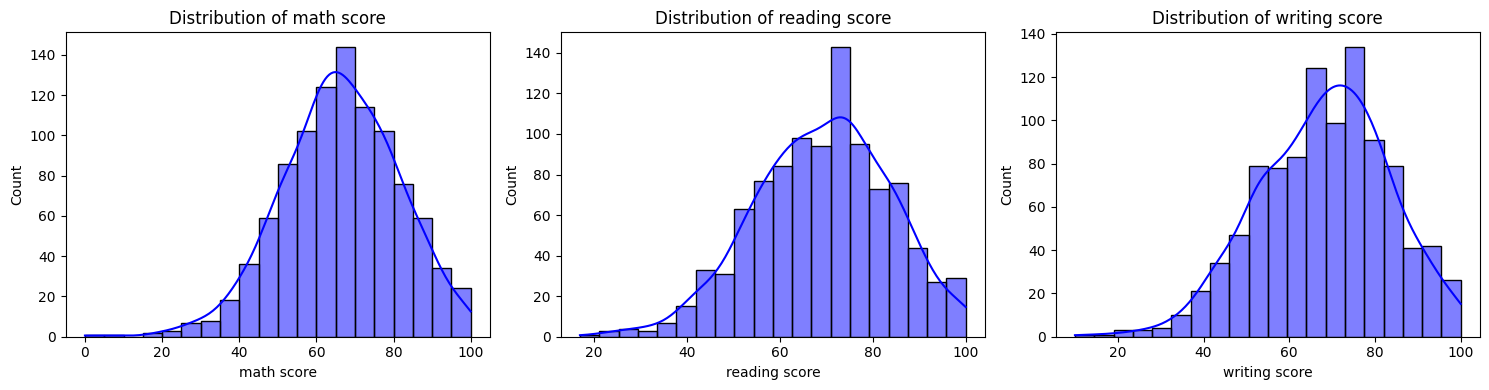

In [48]:
plt.figure(figsize=(15,4))

for idx, column in enumerate(['math score', 'reading score', 'writing score']):
  plt.subplot(1 ,3, idx +1)
  sns.histplot(df[column], kde = True, bins = 20, color = 'blue')
  plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

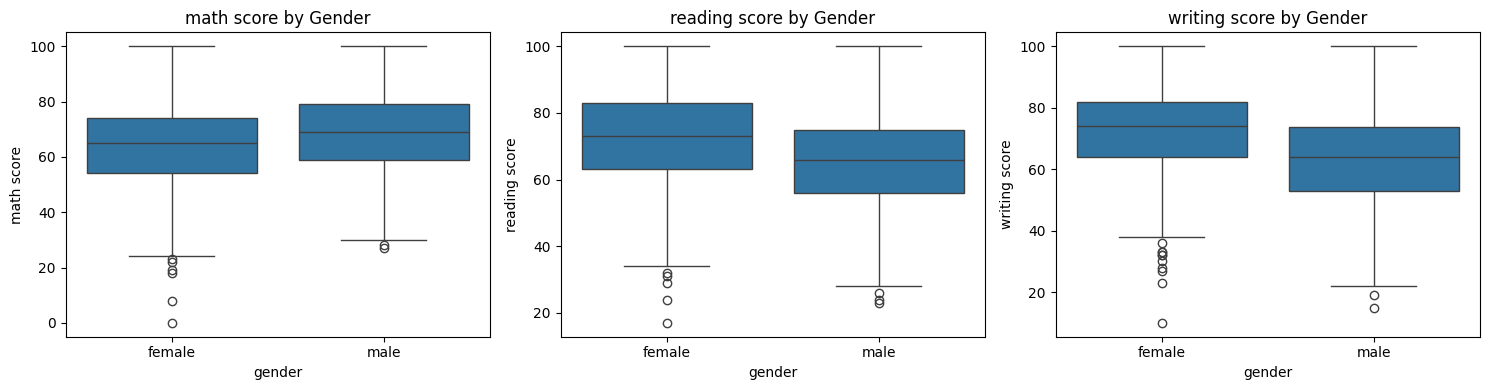

In [49]:
plt.figure(figsize=(15, 4))
for idx, column in enumerate(['math score', 'reading score', 'writing score']):
    plt.subplot(1, 3, idx + 1)
    sns.boxplot(x='gender', y=column, data=df)
    plt.title(f'{column} by Gender')

plt.tight_layout()
plt.show()

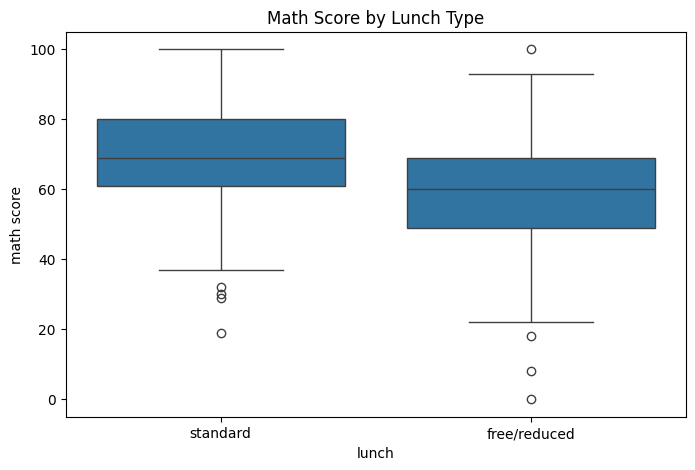

In [50]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='lunch', y='math score', data=df)
plt.title('Math Score by Lunch Type')
plt.show()

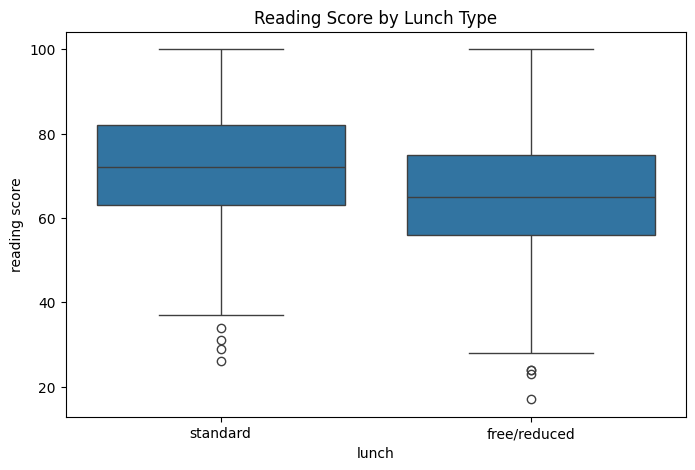

In [51]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='lunch', y='reading score', data=df)
plt.title('Reading Score by Lunch Type')
plt.show()


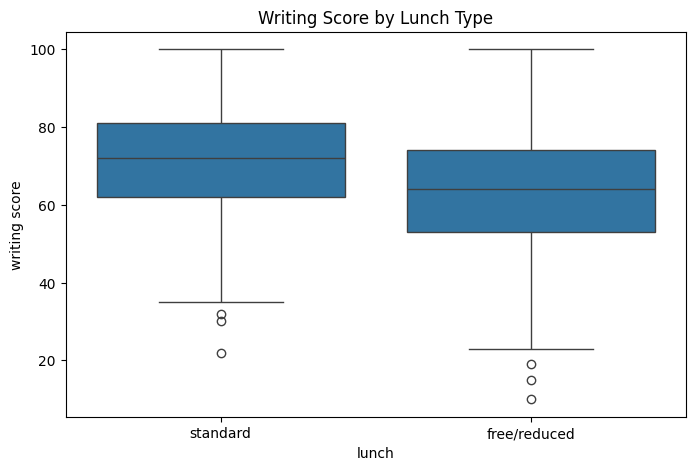

In [52]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='lunch', y='writing score', data=df)
plt.title('Writing Score by Lunch Type')
plt.show()

Create a new column for average score

In [53]:
df['average_score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)

Create pass/fail column

In [54]:
df['pass'] = df['average_score'].apply(lambda x: 1 if x>=60 else 0)

Check distribution

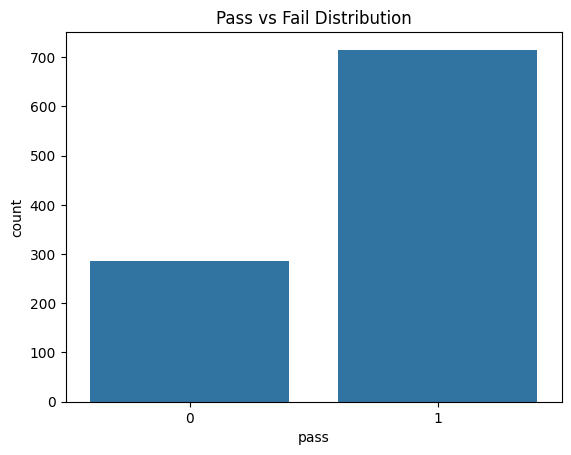

In [55]:
sns.countplot(x='pass', data=df)
plt.title('Pass vs Fail Distribution')
plt.show()

importing library

In [56]:
from sklearn.preprocessing import LabelEncoder

In [57]:
df_encoded = df.copy()
le = LabelEncoder()

Encode all object (string) columns

In [58]:
for column in df_encoded.select_dtypes(include='object'):
  df_encoded[column] = le.fit_transform(df_encoded[column])

Imorting libraries

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Features and target

In [60]:
X = df_encoded.drop(['math score', 'reading score', 'writing score', 'average_score', 'pass'], axis=1)
y = df_encoded['pass']

spliting data

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Training the model

In [62]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Prediction

In [63]:
y_pred = model.predict(X_test)

Evaluating

In [64]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.675

Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.24      0.32        62
           1       0.72      0.87      0.79       138

    accuracy                           0.68       200
   macro avg       0.59      0.56      0.55       200
weighted avg       0.64      0.68      0.64       200


Confusion Matrix:
 [[ 15  47]
 [ 18 120]]


In [65]:
model = RandomForestClassifier(random_state=42, class_weight='balanced')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.55

Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.45      0.38        62
           1       0.71      0.59      0.65       138

    accuracy                           0.55       200
   macro avg       0.52      0.52      0.51       200
weighted avg       0.59      0.55      0.56       200


Confusion Matrix:
 [[28 34]
 [56 82]]


retrain

In [66]:
!pip install xgboost

from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:27:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.66

Classification Report:
               precision    recall  f1-score   support

           0       0.41      0.23      0.29        62
           1       0.71      0.86      0.78       138

    accuracy                           0.66       200
   macro avg       0.56      0.54      0.53       200
weighted avg       0.62      0.66      0.63       200


Confusion Matrix:
 [[ 14  48]
 [ 20 118]]


- Students with standard lunch performed better than those with free/reduced lunch.
- Females performed better in reading and writing, while males did slightly better in math.
- Students who completed test preparation tended to perform better overall.

Final Model: XGBoost Classifier

- Accuracy: ~66%
- The model predicted the 'Pass' class more accurately than 'Fail' due to data imbalance.
- Tried using class_weight and multi-class targets, but they led to worse overall performance.
- Settled on a binary classifier as the most meaningful outcome from this dataset.

✅ Learned how to preprocess and encode categorical features.  
✅ Understood how class imbalance affects performance.  
✅ Experimented with both binary and multi-class classification.  
✅ Learned when to simplify and ship a working model over chasing perfection.